In [61]:
from datascience import *
from datascience.predicates import are
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import random
from collections import defaultdict

In [62]:
import pyspark
sc = pyspark.SparkContext('local[*]')

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at <ipython-input-39-4bc56731f3c8>:2 

In [63]:
WINDOWS_FILE = 'all.k20.windows'
# WINDOWS_FILE = 'windows.txt'

In [64]:
windows = sc.textFile(WINDOWS_FILE)

In [65]:
def line_to_kv(line):
    seq = line.split(',')
    
    return seq[1], (int(seq[0]), seq[1], seq[2])

def find_matches(kv):
    _, grouped = kv
    
    matches = []
    grouped = list(grouped)
    humans = [row[0] for row in grouped if row[2] == 'H']
    mice = [row[0] for row in grouped if row[2] == 'M']
    for human in humans:
        for mouse in mice:
            matches.append((human, mouse))
    return matches

In [66]:
%%time

result = (
    windows
    .map(line_to_kv)
    .groupByKey()
    .map(find_matches)
    .flatMap(lambda x: x)
    .collect()
)
result

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 15.1 s


In [67]:
tabled = Table(['human_i', 'mouse_i']).with_rows(result)
tabled

human_i,mouse_i
2244900000,10902573
2233400000,10009726
832600000,10569428
2075900000,10716945
2478000000,10105916
2716100000,10238937
2819100000,10261244


In [68]:
tabled.sort('human_i').take[0:100]

human_i,mouse_i
832600000,10569428
2075900000,10716945
2233400000,10009726
2244900000,10902573
2478000000,10105916
2716100000,10238937
2819100000,10261244


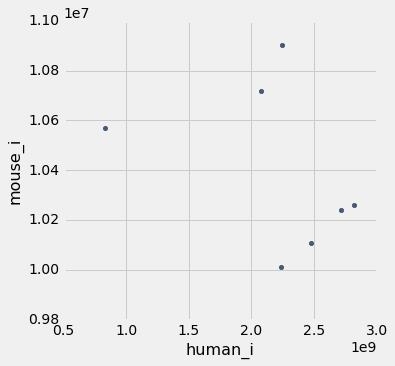

In [69]:
tabled.scatter('human_i', 'mouse_i')